In [457]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
import numpy as np

In [474]:
fs, data = wavfile.read('GuitarSixNotes.wav') # load the data; it is 1:02 seconds long
print ("Frequency sampled at " + str(fs) + " observations per second.")
print ("The data is length " + str(data.shape[0]) + " so it is " + str(data.shape[0]/fs) + " seconds long.")
print ("The datatype is: " + str(data.dtype))  
print ("The data should range from " + str(-2**15) + " to " + str(2**15 - 1) + " (2**15) plus a first bit for +/-.")

Frequency sampled at 48000 observations per second.
The data is length 4850868 so it is 101 seconds long.
The datatype is: int16
The data should range from -32768 to 32767 (2**15) plus a first bit for +/-.


In [481]:
clipSec = data.shape[0]/fs #62 seconds, so figure out a 1 second length
clip = data.T[0][fs*27:fs*28] # this is a two channel soundtrack, grab a 2 secs starting at :10


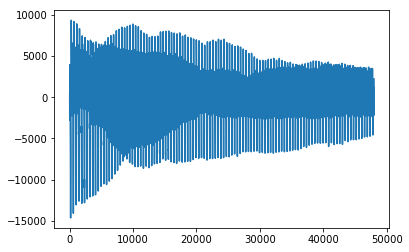

In [482]:
plt.plot(clip)
plt.show()

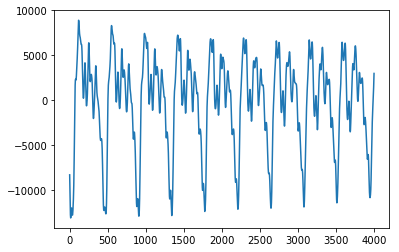

In [484]:
#Show an interesting section where something changes, possibly a bow change?
plt.plot(clip[1000:5000])
plt.show()

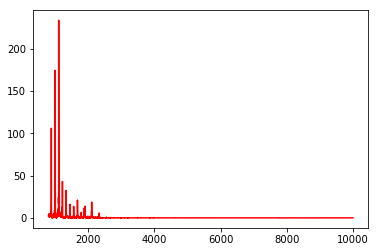

In [485]:
c = fft(clip) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
freqs = np.fft.fftfreq(clip.shape[0], d=1.0/fs)
plt.plot( freqs[800:10000], abs(c[800:10000]/clip.shape[0]), 'r') 
plt.show()


110.0 525.672184726


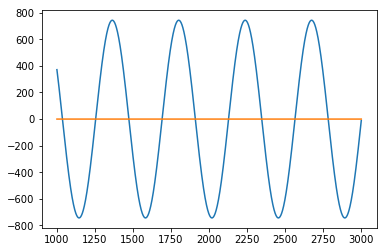

220.0 638.484714303


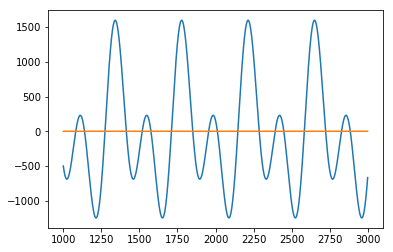

221.0 921.948790619


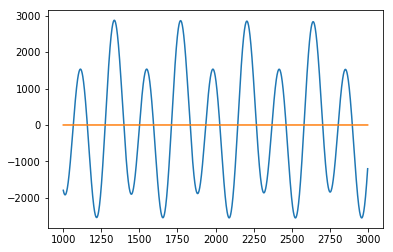

222.0 535.317574511


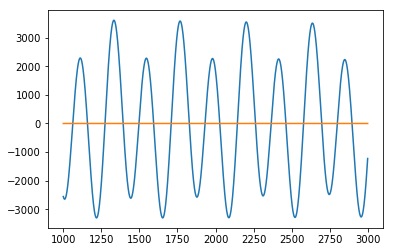

330.0 1156.09056674


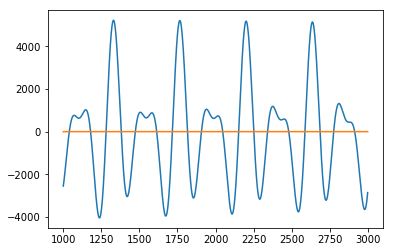

331.0 778.035886975


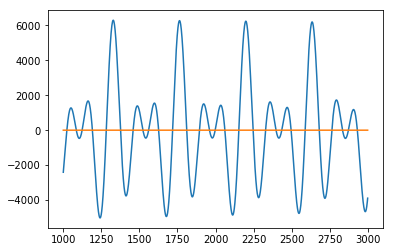

In [486]:
fs = 48000
sample = clip.size
y=np.zeros((sample, 2))
x = np.arange(sample)
freqs = np.fft.fftfreq(clip.shape[0], d=1.0/fs)
for i, j in enumerate(abs(c)/clip.shape[0]):
    if j > 500 and freqs[i] > 0:
        y.T[0] += j*np.sin(2 * np.pi * freqs[i] * x / fs)+j*np.cos(2 * np.pi * freqs[i] * x / fs)
        print freqs[i], j
        plt.plot(x[1000:3000], y[1000:3000])
        plt.show()

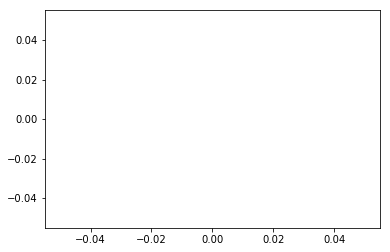

In [487]:
plt.plot(y.T[0][50000:57000])
plt.show()

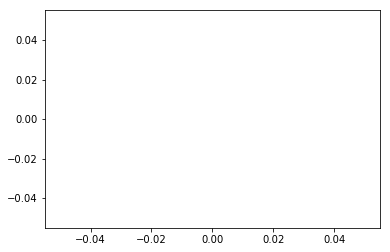

In [488]:
plt.plot(clip[50000:57000])
plt.show()

In [489]:
wavfile.write("Output.wav", 48000, y)

In [402]:
y.T[0]

array([ 30888.19365701,  36489.40172391,  37001.33614106, ...,
         4464.26459574,  11681.08640599,  21340.8355049 ])

In [403]:
clip

array([   -1,     3,    18, ..., -1355, -1380, -1328], dtype=int16)

In [404]:
y.T[0] - clip

array([ 30889.19365701,  36486.40172391,  36983.33614106, ...,
         5819.26459574,  13061.08640599,  22668.8355049 ])

305
(305,)


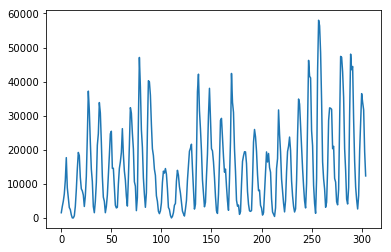

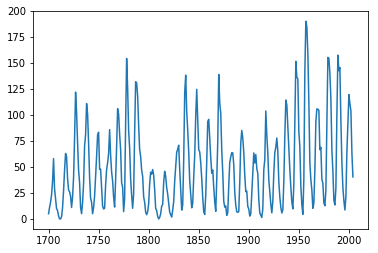

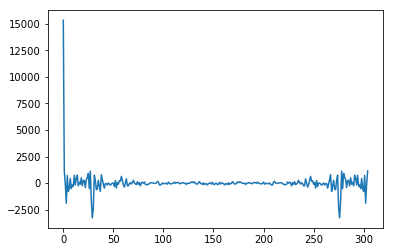

In [496]:
from __future__ import division
import numpy as np
from scipy import *
from matplotlib import pyplot as gplt
from scipy import fftpack

def f(Y,x, N):
    total = 0
    for ctr in range(len(Y)):
        total += Y[ctr] * (np.cos(x*ctr*2*pi/N) + 1j*np.sin(x*ctr*2*pi/N))
    return real(total)

tempdata = np.loadtxt("sunspots.dat")

year=tempdata[:,0]
wolfer=tempdata[:,1]

Y=fft(wolfer)
N=len(Y)
print N
print Y.shape

xs = range(N)
gplt.plot(xs, [f(Y, x, N) for x in xs])
gplt.show()
gplt.plot(year, wolfer)
gplt.show()
gplt.plot(Y)
gplt.show()